In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
%matplotlib notebook

In [4]:
metadata = dict(title='Task 1', artist='Matplotlib', comment='Movie support!')
# writer = FFMpegWriter(fps=15, metadata=metadata)
writer = PillowWriter(fps=15, metadata=metadata)

In [5]:
def vector(vec):
    b, e = vec
    return e - b

In [6]:
# Y = lambda x0: 4 * (x0 ** 2) / 9 + 1  # y(x)

t0, tn, step = -5, 5, 100
T = np.linspace(t0, tn, step)

X = lambda t: 3*t
Y = lambda t: 4*(t**2)+1
P = lambda t:np.array([X(t), Y(t)])

V = lambda t: np.array([P(t), P(t) + np.array([3, 8 * t])])
A = lambda t: np.array([P(t), P(t) + np.array([0, 8])])

At = lambda t: np.array([P(t), P(t) + vector(A(t)).dot(vector(V(t))) / vector(V(t)).dot(vector(V(t))) * vector(V(t))])
An = lambda t: np.array([P(t), P(t) + vector(A(t)) - vector(At(t))])


print(f"p(5) = \n{P(5)}")
print(f"v(5) = \n{V(5)}")
print(f"a(5) = \n{A(5)}")
print(f"at(5) = \n{At(5)}")
print(f"an(5) = \n{An(5)}")

p(5) = 
[ 15 101]
v(5) = 
[[ 15 101]
 [ 18 141]]
a(5) = 
[[ 15 101]
 [ 15 109]]
at(5) = 
[[ 15.         101.        ]
 [ 15.59664388 108.95525171]]
an(5) = 
[[ 15.         101.        ]
 [ 14.40335612 101.04474829]]


<IPython.core.display.Javascript object>


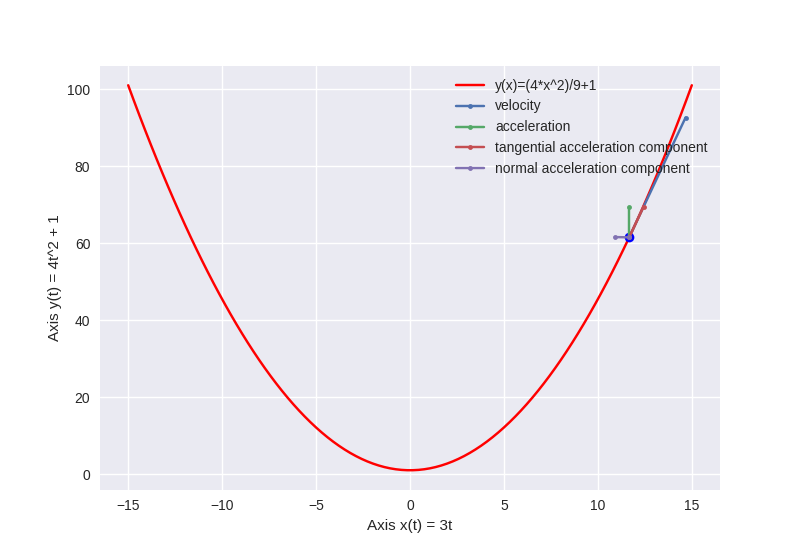

In [7]:
plt.style.use("seaborn")
fig, ax = plt.subplots()
# ax.grid()

parable,  = ax.plot([X(i) for i in T], [Y(i) for i in T], 'r', label='y(x)=(4*x^2)/9+1')
point,  = ax.plot(1,1, 'bo')
velocity, = ax.plot([], [], marker='.', label='velocity')
acc, = ax.plot([], [], marker='.', label='acceleration')
acc_t, = ax.plot([], [], marker='.', label='tangential acceleration component')
acc_n, = ax.plot([], [], marker='.', label='normal acceleration component')

ax.legend(loc='upper right')
ax.set_xlabel("Axis x(t) = 3t")
ax.set_ylabel("Axis y(t) = 4t^2 + 1")

def animate(t):
    px, py = P(t)
    vx, vy = V(t).T
    ax, ay = A(t).T
    atx, aty = At(t).T
    anx, any = An(t).T
    
    
    point.set_data(px, py)
    velocity.set_data(vx, vy)
    acc.set_data(ax, ay)
    acc_t.set_data(atx, aty)
    acc_n.set_data(anx, any)
    
    return parable, point, velocity, acc, acc_t, acc_n


ani = FuncAnimation(fig, animate, frames=T, blit=True, repeat=True, interval=50)

ani.save("task#1.gif", writer=writer)
# ani.save('task#1.gif', writer='imagemagick', fps=30)
plt.show()